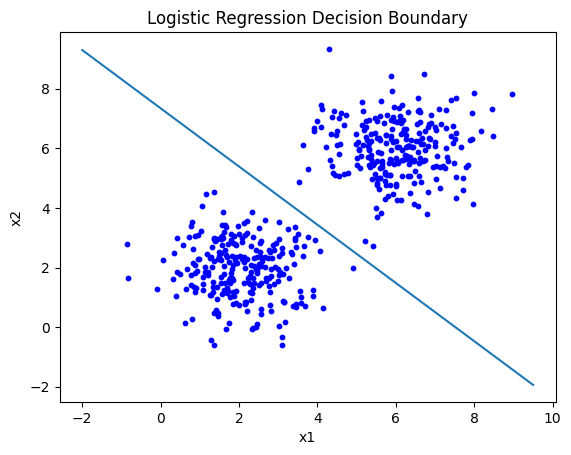

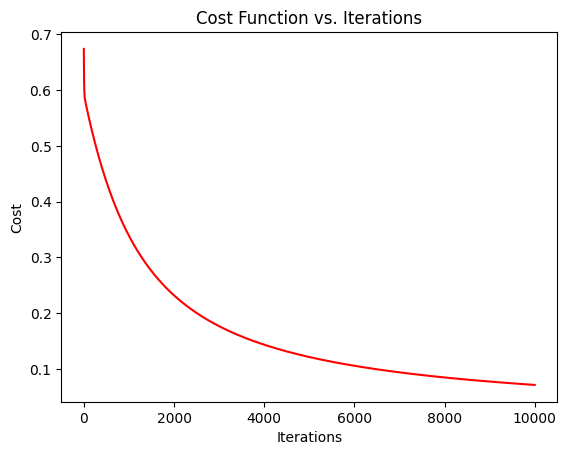

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import data
data = pd.read_csv('Logistic_regression_ls.csv')

# Extract features and labels from the dataset
X = data[['x1', 'x2']].values.reshape((-1, 2))
y = data['label'].values.reshape((-1, 1))

# Add a column of ones to X to account for the bias (intercept) term
x0 = np.ones((y.shape[0], 1))
X = np.concatenate((x0, X), axis=1)

# Plot the data points
plt.scatter(X[:, 1], X[:, 2], c='b', s=10)

# Define the Logistic Regression class
class Logistic_regression:
    def __init__(self):
        pass
    
    # Sigmoid function to map predicted values to probabilities
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    # Cost function to compute the error of the model
    def cost_func(self, w, X, y):
        m = y.shape[0]
        y_pred = self.sigmoid(X.dot(w.T))
        J = (-1 / m) * np.sum(y.T.dot(np.log(y_pred)) + (1 - y).T.dot(np.log(1 - y_pred)))
        return J
    
    # Fit the model to the data using gradient descent
    def fit(self, w, X, y, alpha, iters):
        m = y.shape[0]
        cost_history = np.zeros(iters)
        
        for i in range(iters):
            # Compute the predicted values
            y_pred = self.sigmoid(X.dot(w.T))
            # Compute the gradient of the cost function
            dw = (1 / m) * (y_pred - y).T.dot(X)
            # Update the weights
            w = w - alpha * dw
            # Save the cost for the current iteration
            cost_history[i] = self.cost_func(w, X, y)
        
        return w, cost_history

# Initialize parameters
w = np.zeros((1, X.shape[1]))  # Weights initialized to zeros
alpha = 0.01  # Learning rate
iters = 10000  # Number of iterations

# Create an instance of the Logistic Regression model
lr = Logistic_regression()
# Train the model
w, cost_history = lr.fit(w, X, y, alpha, iters)

# Plot the decision boundary
x1 = np.arange(-2, 10, 0.5)  # Generate values for x1
# Calculate corresponding x2 values using the learned weights
x2 = -(w[0][0] + w[0][1] * x1) / w[0][2]
plt.plot(x1, x2)

# Display the decision boundary plot
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

# Plot the cost function over iterations
plt.figure()
plt.plot(np.arange(iters), cost_history, 'r')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function vs. Iterations')
plt.show()
